### Data Exploration

In this section, we describe the relevant columns of the dataset and their interpretation according to the business logic.

| **Column**              | **Description**                                                                                      | **Expected Range**                | **Justification**                                                                                   |
|-------------------------|------------------------------------------------------------------------------------------------------|-----------------------------------|-----------------------------------------------------------------------------------------------------|
| **ID**                  | A unique identifier for each customer or transaction.                                                | Unique identifier in **string** format | A unique identifier for each record.                                                                |
| **n_clicks**            | The number of clicks made by the user in the online store, indicating interest.                      | Positive values                   | Negative values are nonsensical and should be corrected. Expected range is 0 to 1000 clicks.        |
| **n_visitas**           | The number of visits to the online store by a customer.                                              | Positive values                   | Negative values are invalid. Common range is 0 to 300 visits depending on the customer.             |
| **monto_compras**       | The total amount spent by the customer in the store.                                                 | Positive values                   | Negative values are not valid. Exceptional values may exceed 5000 monetary units but are valid.     |
| **monto_descuentos**    | The total amount of discounts applied to the customer.                                               | Positive values                   | Discounts cannot be negative. They are typically based on a percentage of the total purchase.       |
| **dias_primera_compra** | The number of days since the customer's first purchase.                                             | Positive values                   | Negative values are not possible. Expected range is from 0 to 500 days.                            |
| **info_perfil**         | Classification of customers into profiles based on behavior or characteristics.                      | Integers between 100 and 350      | Negative values are illogical and should be corrected. This field categorizes customers by behavior. |

In [154]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [155]:
# Util functions
def hist(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="hist")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

def box(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="box")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

In [156]:
# Loading dataset
dataset_path = "../data/raw/dataset_ecommerce.csv"
df = pd.read_csv(dataset_path)

In [199]:
# Viewing data
print(df.head())
print(df.describe())

         ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
0  GGNEPpxo     198.0       44.0         3393.0              67.0   
1  tRA5byjK     303.0       74.0         3026.3              90.4   
2  vWxSsT0V     267.0       60.0         3490.2              80.5   
3  sxVV8jGL     177.0       85.0         3525.1              92.7   
4  YBs4XIN5     224.0       73.0         2980.9              72.6   

   dias_primera_compra  info_perfil  
0                241.0        235.0  
1                193.0        246.0  
2                111.0        220.0  
3                142.0        200.0  
4                227.0        109.0  
           n_clicks     n_visitas  monto_compras  monto_descuentos  \
count  55056.000000  55056.000000   55056.000000      55056.000000   
mean     408.731873     94.035786    1748.497301        448.934659   
std      175.648336     34.877358    1164.886365        503.140748   
min       10.000000      0.000000       4.700000          0.000000   
25%    

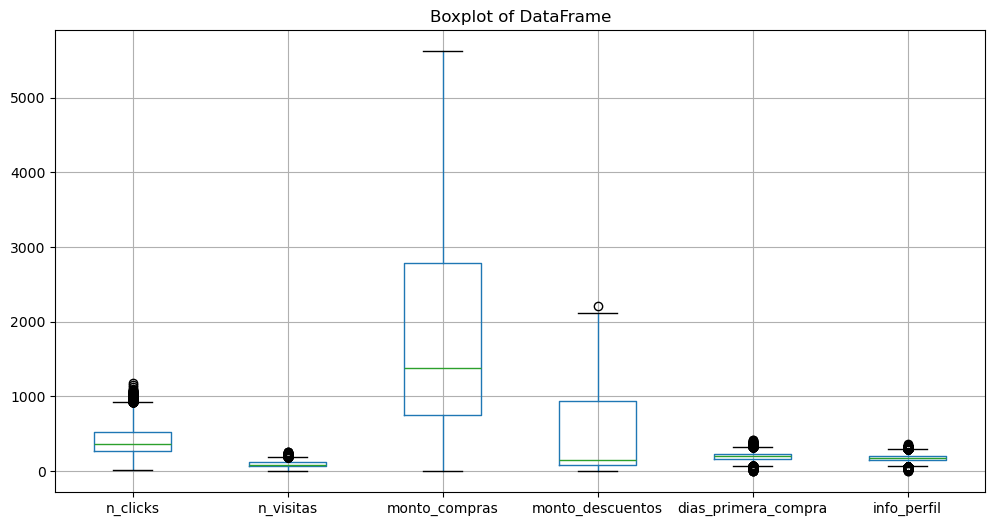

In [200]:
# Viewing the distributions of all columns
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of DataFrame")
plt.show()

In [159]:
numerical_df = df.drop(columns=["ID"])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                     n_clicks  n_visitas  monto_compras  monto_descuentos  \
n_clicks             1.000000   0.554308      -0.435220          0.697419   
n_visitas            0.554308   1.000000      -0.381722          0.639706   
monto_compras       -0.435220  -0.381722       1.000000         -0.258211   
monto_descuentos     0.697419   0.639706      -0.258211          1.000000   
dias_primera_compra  0.031789   0.030137      -0.016804          0.039495   
info_perfil         -0.115706  -0.105365       0.112933         -0.119133   

                     dias_primera_compra  info_perfil  
n_clicks                        0.031789    -0.115706  
n_visitas                       0.030137    -0.105365  
monto_compras                  -0.016804     0.112933  
monto_descuentos                0.039495    -0.119133  
dias_primera_compra             1.000000    -0.006447  
info_perfil                    -0.006447     1.000000  


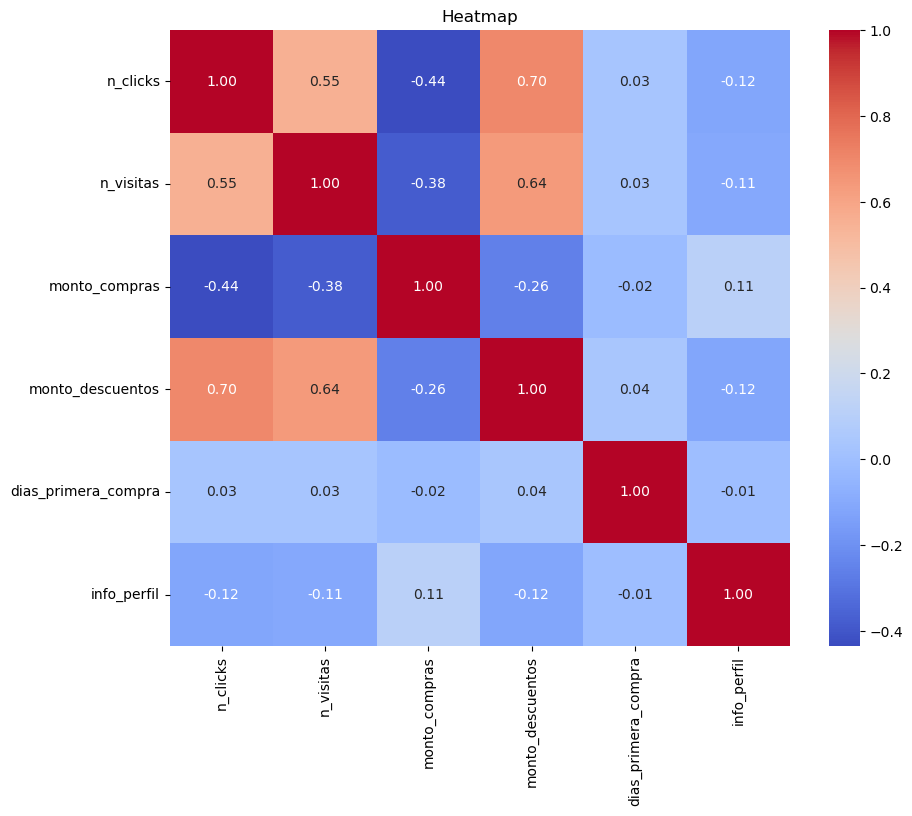

In [160]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap")
plt.show()

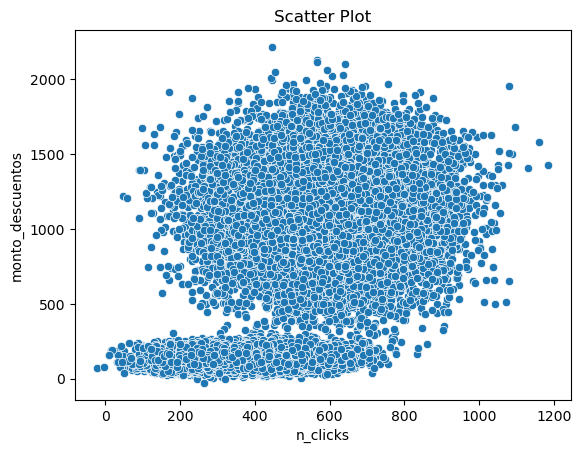

In [161]:
sns.scatterplot(x=df["n_clicks"], y=df["monto_descuentos"])
plt.title("Scatter Plot")
plt.show()

#### Cleaning Null Data
In this section, we will begin by analyzing and handling NaN values.

In [162]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


In [163]:
# Looking for NaN values in dataframe
print(df[df.isnull().any(axis=1)])

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
322    9tJuzqv2     234.0        NaN         2966.3              89.1   
575    fxADTnTp     302.0       72.0            NaN              72.9   
1794   2gf5Hlv4     320.0       48.0            NaN              88.3   
2355   DuIxWNRx     251.0       85.0         3218.3              82.8   
4461   m2qRM7GV     201.0       97.0         3290.1              99.0   
5145   9gXNhlkr       NaN       84.0         2447.6              99.0   
5213   xXneFmSB     213.0       49.0         4715.4              71.1   
12176  Aivyl6NW     295.0       53.0            NaN              67.5   
12821  wFI0ve3K     237.0        NaN         3416.8              80.8   
16540  3rLG6MOc     259.0       78.0         3554.5             106.1   
17162  awa5cwh8       NaN       64.0         2939.2              64.6   
25421  6beOIYdL     455.0      127.0            NaN            1184.8   
25453  yIkbk0y9     607.0        NaN         1546.9

##### Looking for specific NaN values per column

In [164]:
# Looking NaN values in n_clicks column
df_with_nulls = df[df["n_clicks"].isnull()]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
5145   9gXNhlkr       NaN       84.0         2447.6              99.0   
17162  awa5cwh8       NaN       64.0         2939.2              64.6   
26692  VXX86e57       NaN       78.0         1841.5             943.9   
27951  44CtUXDA       NaN      137.0         1629.5            1467.6   
36739  2t43iRJl       NaN      104.0          344.9             108.8   
37424  qRwHB2FO       NaN       98.0          921.7             137.2   
40894  Y5v5Cfm5       NaN      119.0          656.3             147.7   

       dias_primera_compra  info_perfil  
5145                 126.0        236.0  
17162                192.0        160.0  
26692                138.0        182.0  
27951                134.0        178.0  
36739                237.0        175.0  
37424                234.0        214.0  
40894                232.0        153.0  


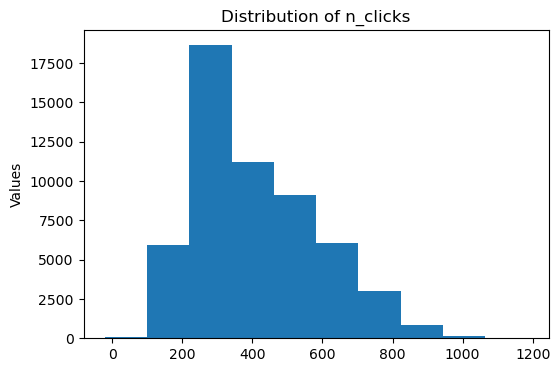

In [165]:
# Viewing distribution of n_clicks
hist(df, "n_clicks")

The NaN values in the `n_clicks` column represent errors according to the business logic. Since these clients are regular, the missing values can be reasonably replaced with the median of the column. Therefore, they will be replaced with the median.

In [166]:
# Replacing NaN n_clicks with the mean of n_clicks
df["n_clicks"] = df["n_clicks"].fillna(df["n_clicks"].median())

In [167]:
# Looking NaN values in n_visitas column
df_with_nulls = df[df["n_visitas"].isnull()]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
322    9tJuzqv2     234.0        NaN         2966.3              89.1   
12821  wFI0ve3K     237.0        NaN         3416.8              80.8   
25453  yIkbk0y9     607.0        NaN         1546.9            1220.0   
35405  oAuY09Si     444.0        NaN          920.1            1242.8   
47362  fB5ROmQw     500.0        NaN          806.8             149.9   
51214  ODoXBOet     486.0        NaN          499.3             116.9   
52169  6dkx0U2q     305.0        NaN          382.0             139.9   
53415  5vK1od0S     554.0        NaN          880.5             133.2   

       dias_primera_compra  info_perfil  
322                  222.0        183.0  
12821                147.0        165.0  
25453                120.0        248.0  
35405                185.0        153.0  
47362                231.0        193.0  
51214                126.0        204.0  
52169                216.0        169.0  
53415 

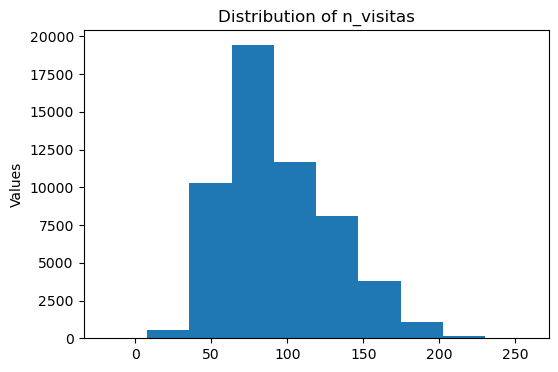

In [168]:
# Viewing distribution of n_visitas
hist(df, "n_visitas")

For the NaN values in the `n_visitas` column, we will treat them replacing the NaN values with the mean of the column. According to the business logic, these values represent the number of visits made by the client. Therefore, it is reasonable to replace these missing values with the column's mean, assuming that these clients are regular based on their data.

In [169]:
# Replacing NaN n_visitas with the mean of n_visitas
df["n_visitas"] = df["n_visitas"].fillna(df["n_visitas"].mean())

In [170]:
# Viewing NaN values
print("Total NaN values per column:")
print(df.isna().sum())

Total NaN values per column:
ID                     0
n_clicks               0
n_visitas              0
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


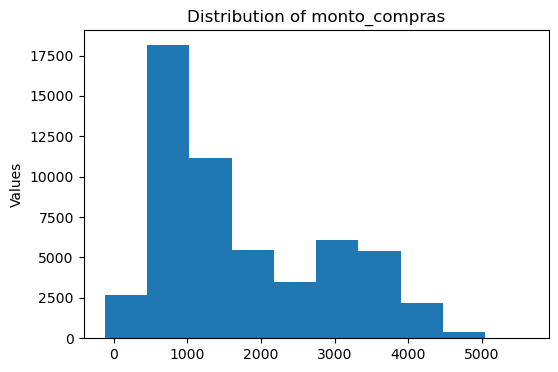

In [171]:
# Viewing distribution of monto_compras
hist(df, "monto_compras")

This distribution is asymmetric and shows a slight right skew. The mean would be influenced by the higher values, while the median, not being affected by extreme values, better represents the center of the distribution. Therefore, replacing the NaN values with the median preserves consistency and avoids distortions in the analysis.

In [172]:
# Replacing NaN monto_compras with the median of monto_compras
df["monto_compras"] = df["monto_compras"].fillna(df["monto_compras"].median())

In [173]:
# Verifying replaced values
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)

             ID  n_clicks  n_visitas  monto_compras  monto_descuentos  \
2355   DuIxWNRx     251.0       85.0         3218.3              82.8   
4461   m2qRM7GV     201.0       97.0         3290.1              99.0   
5213   xXneFmSB     213.0       49.0         4715.4              71.1   
16540  3rLG6MOc     259.0       78.0         3554.5             106.1   
29274  bdWwPeqZ     679.0      118.0         1153.9               NaN   
30243  nFR6Nb9u     651.0      126.0         1599.6               NaN   
31593  EmxKuekb     728.0      108.0         1767.4            1227.0   
35991  p3QEz4w8     531.0      140.0         1509.1             889.4   
41286  F5HDwZQl     300.0      119.0          639.5             157.1   
41763  u3uTwE4a     327.0       42.0          802.4               NaN   
43061  7eWUiBnp     506.0      101.0         1011.0             149.3   
47663  bKQWNgmS     451.0       63.0          614.9               NaN   
51891  vgPOW2B5     478.0       80.0          563.5

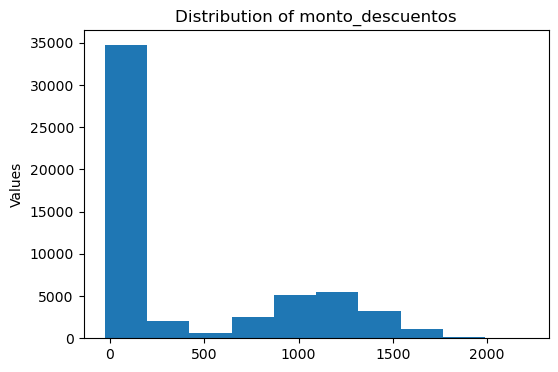

In [174]:
# Viewing distribution of monto_descuentos
hist(df, "monto_descuentos")

For the NaN values in `monto_descuentos`, we decided to treat them the same way as `monto_compras`, replacing the NaN values with the median of the column.

In [175]:
# Replacing NaN monto_descuentos with the median of monto_descuentos
df["monto_descuentos"] = df["monto_descuentos"].fillna(df["monto_descuentos"].median())

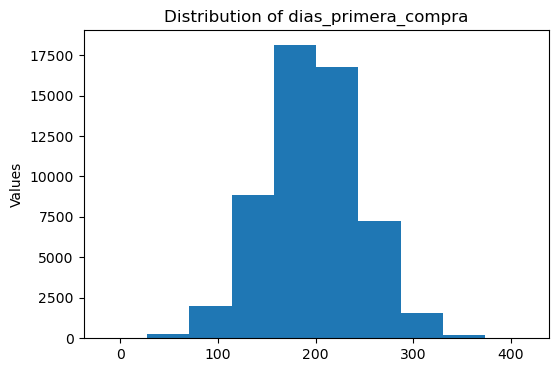

In [176]:
# Viewing distribution of dias_primera_compra
hist(df, "dias_primera_compra")

The distribution of `dias_primera_compra` is approximately normal. Therefore, the unique NaN values in this column will be replaced with the mean of `dias_primera_compra`.

In [177]:
df["dias_primera_compra"] = df["dias_primera_compra"].fillna(df["dias_primera_compra"].mean())

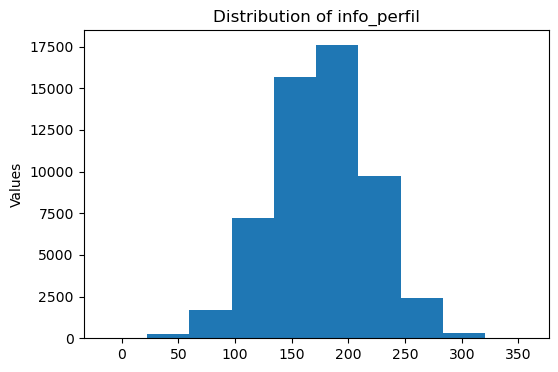

In [178]:
# Viewing distribution of info_perfil
hist(df, "info_perfil")

The distribution of `info_perfil` looks similar to that of `dias_primera_compra`. So, we will replace NaN values with the mean.

In [179]:
df["info_perfil"] = df["info_perfil"].fillna(df["info_perfil"].mean())

#### Cleaning Negative Data

In [180]:
print((numerical_df < 0).sum())

n_clicks               2
n_visitas              4
monto_compras          1
monto_descuentos       2
dias_primera_compra    5
info_perfil            1
dtype: int64


In [181]:
print(numerical_df[(numerical_df < 0).any(axis=1)])

       n_clicks  n_visitas  monto_compras  monto_descuentos  \
36997     483.0       -6.0          630.2             137.7   
37128     296.0      117.0          592.3             189.5   
38594     267.0       62.0         1117.6             116.9   
40309     368.0      -12.0         1048.2             108.7   
41638     364.0      -20.0          650.8             125.0   
42255     420.0       -4.0          413.6             152.3   
47195     263.0       70.0         -123.1             109.6   
47567     264.0       62.0          740.0             -27.7   
47620     255.0       82.0          856.2             208.9   
50046     344.0      119.0          674.1             117.5   
51799     319.0      103.0          512.2              -0.6   
52456     -21.0      135.0          771.5              74.0   
52665     400.0       72.0          783.6             174.0   
54157      -3.0       95.0          735.1              76.5   
55007     480.0      102.0          365.5             1

The negative values in `n_clicks` are errors, so these values will be replaced by the median. In the same way and for the same reason, `n_visitas` and `monto_compras` will be treated the same way.

In [182]:
# Replacing negative values in n_clicks with the median
median = df["n_clicks"][df["n_clicks"] >= 0].median()
df["n_clicks"] = df["n_clicks"].apply(lambda x: median if x < 0 else x)

In [183]:
# Replacing negative values in n_visitas with the median
median = df["n_visitas"][df["n_visitas"] >= 0].median()
df["n_visitas"] = df["n_visitas"].apply(lambda x: median if x < 0 else x)

In [184]:
# Replacing negative values in n_visitas with the median
median = df["monto_compras"][df["monto_compras"] >= 0].median()
df["monto_compras"] = df["monto_compras"].apply(lambda x: median if x < 0 else x)

Negative values in `monto_descuentos` will be replaced with zero to simulate cases where there are no discounts applied, allowing us to observe the impact on the analysis.

In [185]:
# Replacing negative values in monto_descuentos with 0
df["monto_descuentos"] = df["monto_descuentos"].apply(lambda x: 0 if x < 0 else x)

Negative values in `dias_primera_compra` and `info_perfil` will be replaced with the mean due to their distribution, ensuring consistency in the dataset while preserving overall trends.

In [186]:
# Replacing negative values in dias_primera_compra with the mean
mean = df["dias_primera_compra"][df["dias_primera_compra"] >= 0].mean()
df["dias_primera_compra"] = df["dias_primera_compra"].apply(lambda x: mean if x < 0 else x)

In [187]:
# Replacing negative values in info_perfil with the mean
mean = df["info_perfil"][df["info_perfil"] >= 0].mean()
df["info_perfil"] = df["info_perfil"].apply(lambda x: mean if x < 0 else x)

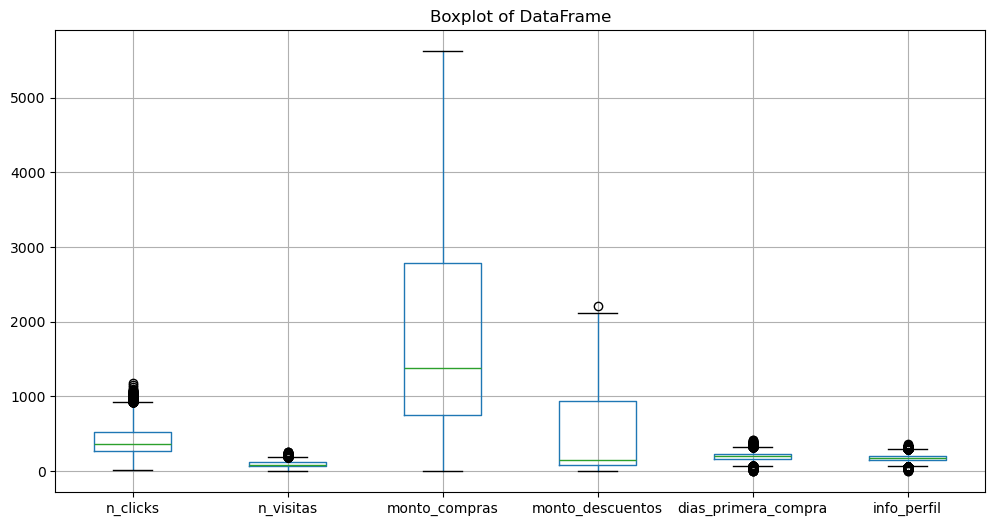

In [201]:
# Viewing the distributions of all columns
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of DataFrame")
plt.show()

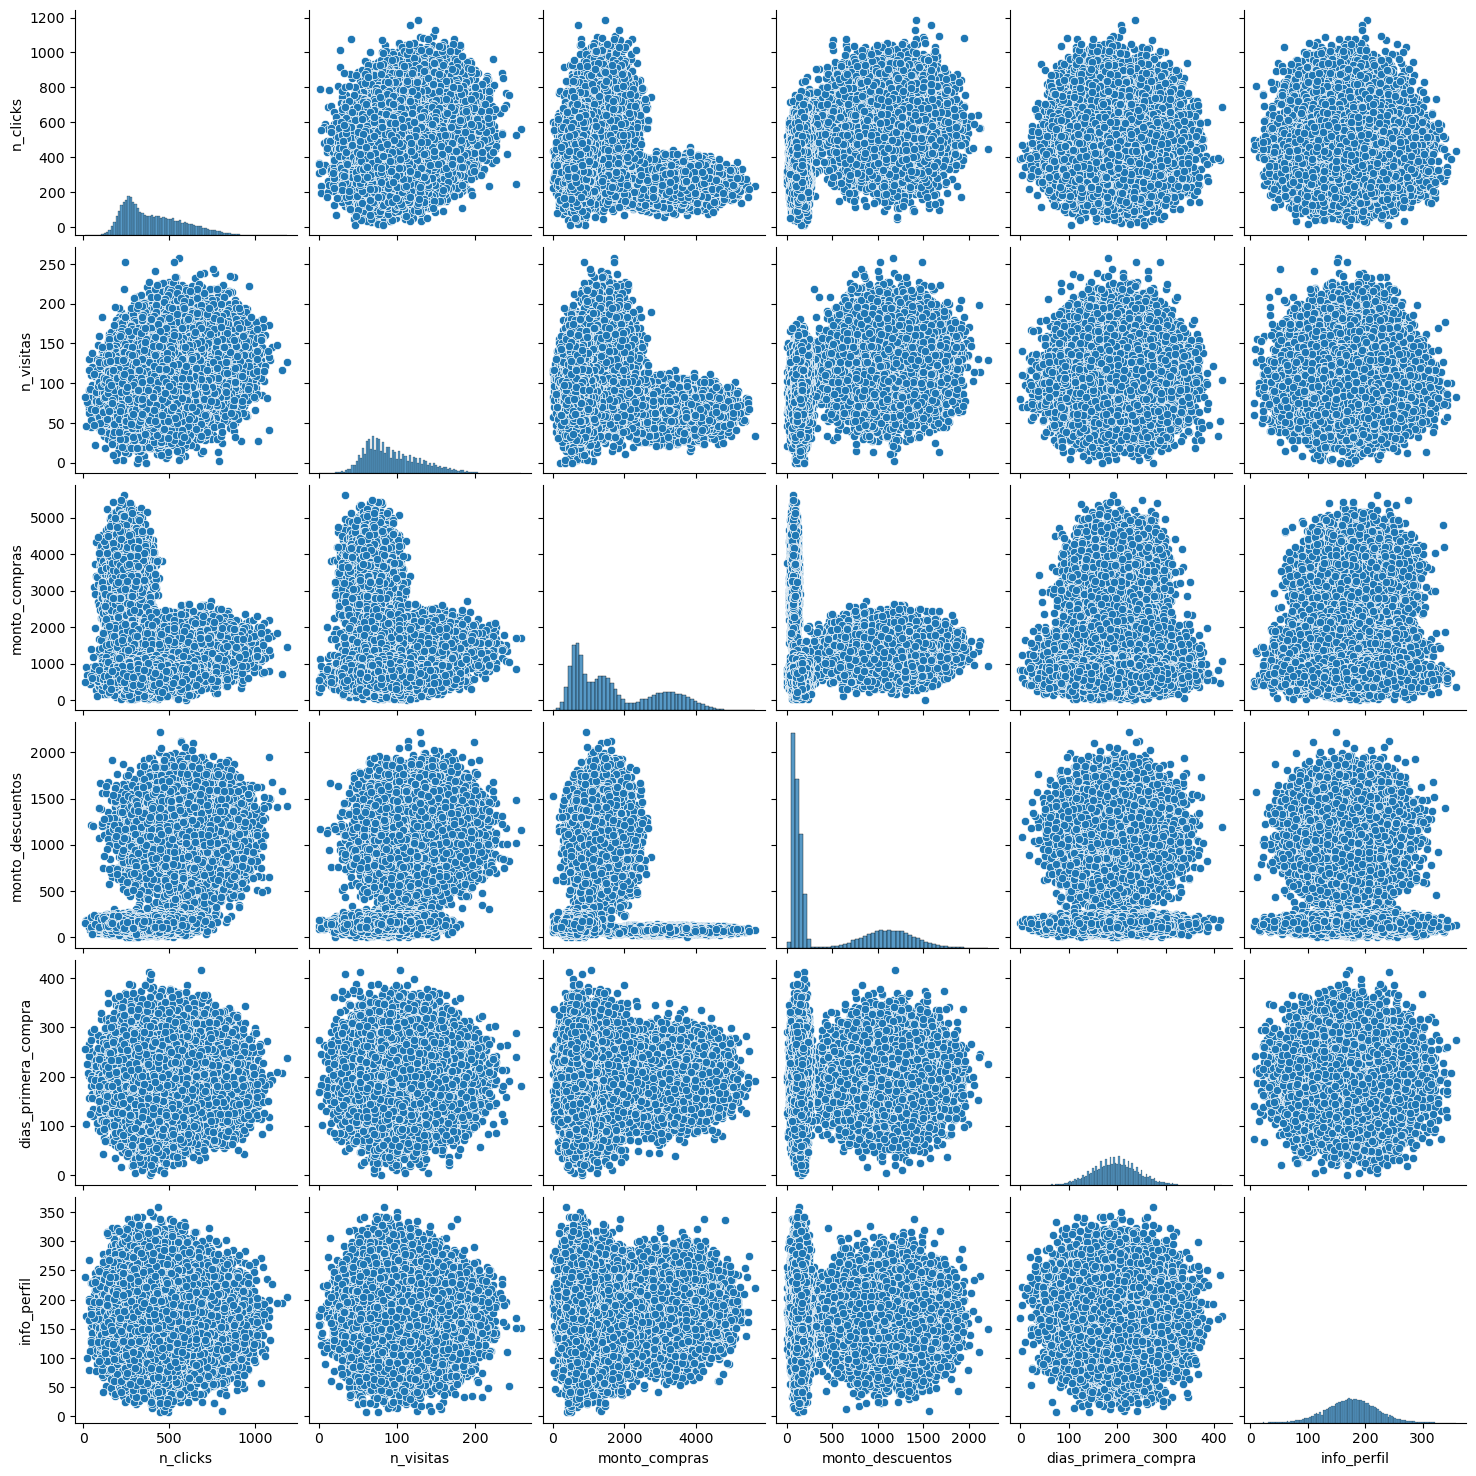

In [189]:
sns.pairplot(df)

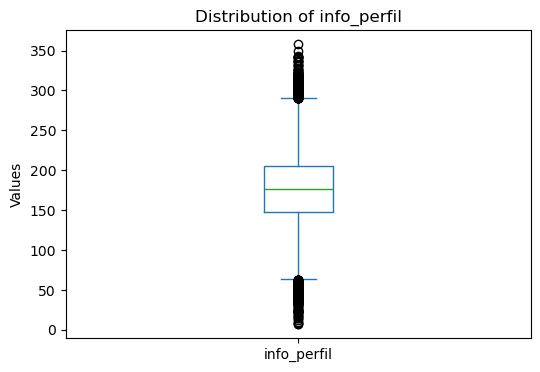

In [198]:
box(df, "info_perfil")